In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [2]:
products_df = pd.read_csv('Products_with_Categories.csv')
transactions_df = pd.read_csv('Transactions.csv')

### Thông tin sản phẩm Products_with_Categories

In [3]:
print(products_df.info()) #Cửa hàng này kinh doanh 167 sản phẩm khác nhau #Không có giá trị thiếu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB
None


In [4]:
print(products_df.describe()) #Giá trung bình 6. Giá cao nhất 28.5 và thấp nhất 0.3; 50% sản phẩm có giá dưới 4.9 và 75% sản phẩm có giá dưới 8.5

       productId       price
count  167.00000  167.000000
mean    84.00000    6.040180
std     48.35287    4.949217
min      1.00000    0.300000
25%     42.50000    2.500000
50%     84.00000    4.900000
75%    125.50000    8.500000
max    167.00000   28.500000


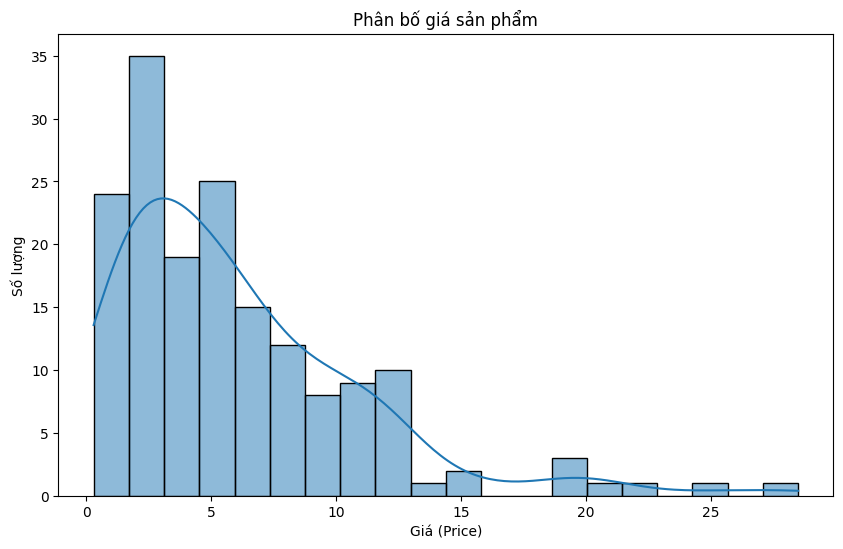

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['price'], bins=20, kde=True)
plt.title('Phân bố giá sản phẩm')
plt.xlabel('Giá (Price)')
plt.ylabel('Số lượng')
plt.show()

/var/folders/jw/z9bq55nx29sdfsqkbsy19_2h0000gn/T/ipykernel_9461/3235105163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='Category', y='Product_Count', palette='viridis')


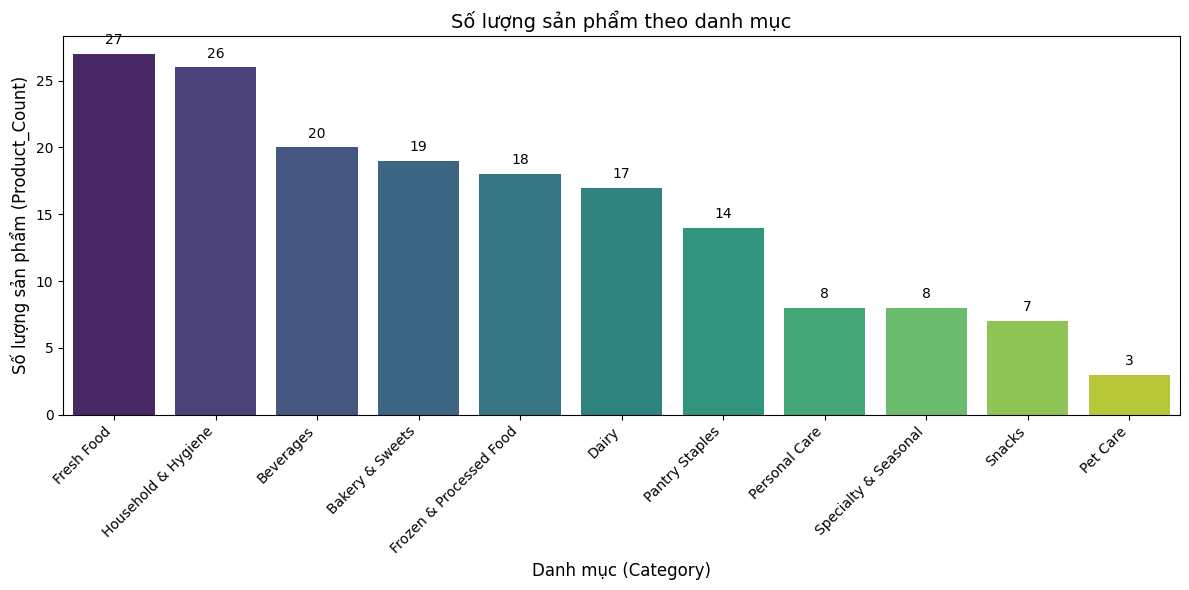

In [6]:
category_counts = products_df.groupby('Category')['productName'].nunique().reset_index(name='Product_Count')
category_counts = category_counts.sort_values(by='Product_Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts, x='Category', y='Product_Count', palette='viridis')
plt.title('Số lượng sản phẩm theo danh mục', fontsize=14)
plt.xlabel('Danh mục (Category)', fontsize=12)
plt.ylabel('Số lượng sản phẩm (Product_Count)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

for i, v in enumerate(category_counts['Product_Count']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()

#### Có 11 Category, Category nhiều nhất loại sản phẩm mà cửa hàng đang kinh doanh lần lượt là FreshFood, Household&Hygiene, Beverage,....

### THÔNG TIN GIAO DỊCH TẠI FILE TRANSACTIONS

In [7]:
print(transactions_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB
None


In [8]:
print(transactions_df.describe())  # 1 khách hàng, trong 1 lần giao dịch mua 1 mặt hàng có số lượng từ 1 đến 3

       Member_number     productId         items
count   38765.000000  38765.000000  38765.000000
mean     3003.641868     39.956094      1.996131
std      1153.611031     37.294166      0.817645
min      1000.000000      1.000000      1.000000
25%      2002.000000      9.000000      1.000000
50%      3005.000000     25.000000      2.000000
75%      4007.000000     64.000000      3.000000
max      5000.000000    167.000000      3.000000


In [9]:
print(transactions_df.isnull().sum()) # không thiếu dữ liệu

Member_number    0
Date             0
productId        0
items            0
dtype: int64


In [10]:
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'], format='%d-%m-%Y')

In [11]:
transactions_df['order_id'] = transactions_df.groupby(['Member_number', 'Date']).ngroup() + 1

In [12]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Member_number  38765 non-null  int64         
 1   Date           38765 non-null  datetime64[ns]
 2   productId      38765 non-null  int64         
 3   items          38765 non-null  int64         
 4   order_id       38765 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.5 MB


### Giả sử 1 ngày 1 người chỉ có 1 lượt giao dịch (Frequency)

In [13]:
#Merge 2 bộ dữ liệu
merged_df = pd.merge(transactions_df, products_df, on='productId', how='left')

In [14]:
# Giá trị mỗi lượt giao dịch
merged_df['Total_Cost'] = merged_df['price'] * merged_df['items']
merged_df.head()

,Member_number,Date,productId,items,order_id,productName,price,Category,Total_Cost
0,1808,2015-07-21,1,3,2988,tropical fruit,7.8,Fresh Food,23.4
1,2552,2015-01-05,2,1,5784,whole milk,1.8,Dairy,1.8
2,2300,2015-09-19,3,3,4852,pip fruit,3.0,Fresh Food,9.0
3,1187,2015-12-12,4,3,688,other vegetables,0.8,Fresh Food,2.4
4,3037,2015-02-01,2,1,7585,whole milk,1.8,Dairy,1.8


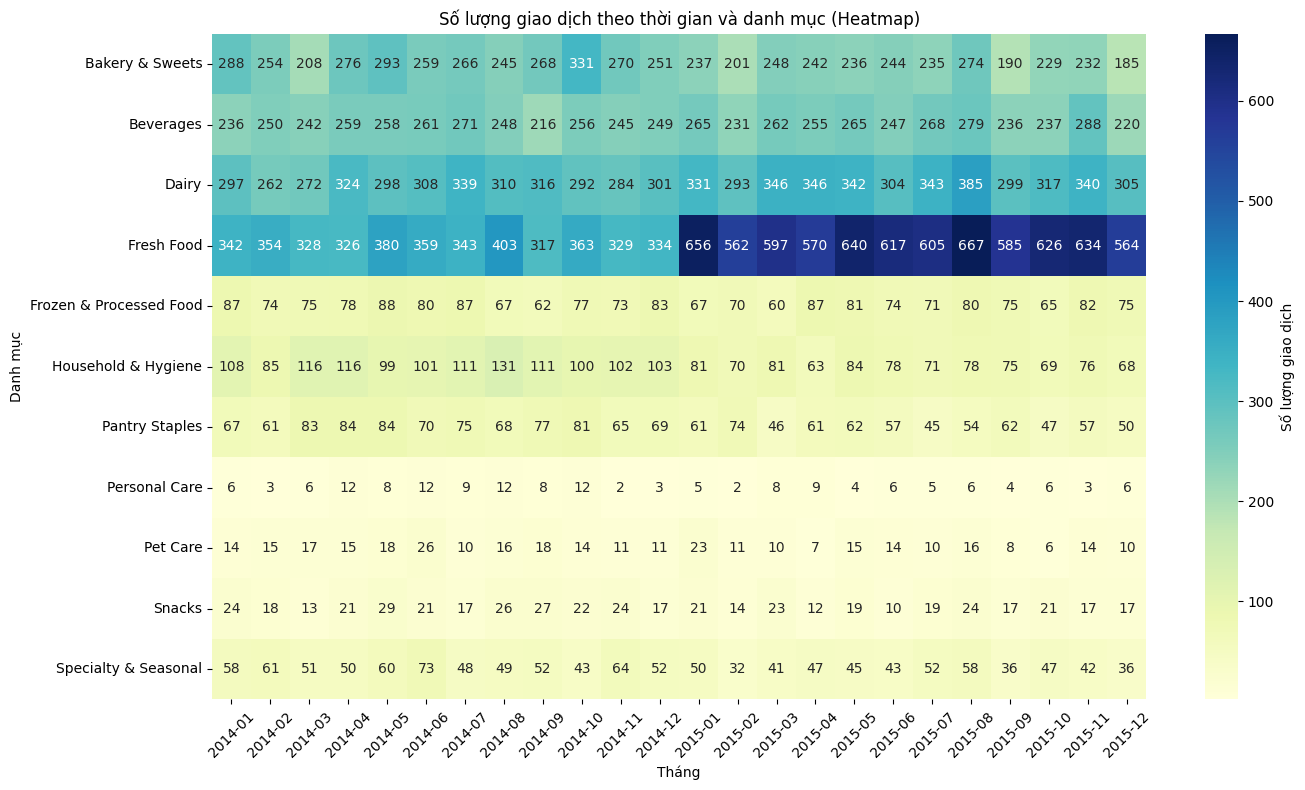

In [15]:
# Tạo cột Month từ Date
merged_df['Month'] = merged_df['Date'].dt.to_period('M')

# Nhóm dữ liệu theo Month và Category, đếm số lượng giao dịch
monthly_category_transactions = merged_df.groupby(['Month', 'Category']).size().reset_index(name='Transaction_Count')
pivot_table = monthly_category_transactions.pivot(index='Category', columns='Month', values='Transaction_Count').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Số lượng giao dịch'})
plt.title('Số lượng giao dịch theo thời gian và danh mục (Heatmap)')
plt.xlabel('Tháng')
plt.ylabel('Danh mục')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Nhận xét: Trong 2 năm có thể thấy, lượng hàng bán khá đều

Nhóm category chủ lực trong kinh doanh của cửa hàng là: Bakery&Sweet , Beverage, Dairy, Freshfood

Trong đó nguyên năm 2025, doanh số nhóm category Freshfood tăng mạnh và giữ được số lượng giao dịch khá cao duy trì đều

In [16]:
print(merged_df.describe())

       Member_number     productId         items      order_id         price  \
count   38765.000000  38765.000000  38765.000000  38765.000000  38765.000000   
mean     3003.641868     39.956094      1.996131   7470.155217      4.295170   
std      1153.611031     37.294166      0.817645   4322.026670      4.313656   
min      1000.000000      1.000000      1.000000      1.000000      0.300000   
25%      2002.000000      9.000000      1.000000   3733.000000      1.250000   
50%      3005.000000     25.000000      2.000000   7466.000000      2.500000   
75%      4007.000000     64.000000      3.000000  11195.000000      6.100000   
max      5000.000000    167.000000      3.000000  14963.000000     28.500000   

         Total_Cost  
count  38765.000000  
mean       8.568545  
std        9.937551  
min        0.300000  
25%        2.400000  
50%        5.200000  
75%       10.500000  
max       85.500000  


Nhận xét: 

75% giao dịch có giá trị dưới 10.5
Giao dịch lớn nhất là 85.5, thấp nhất là 0.3

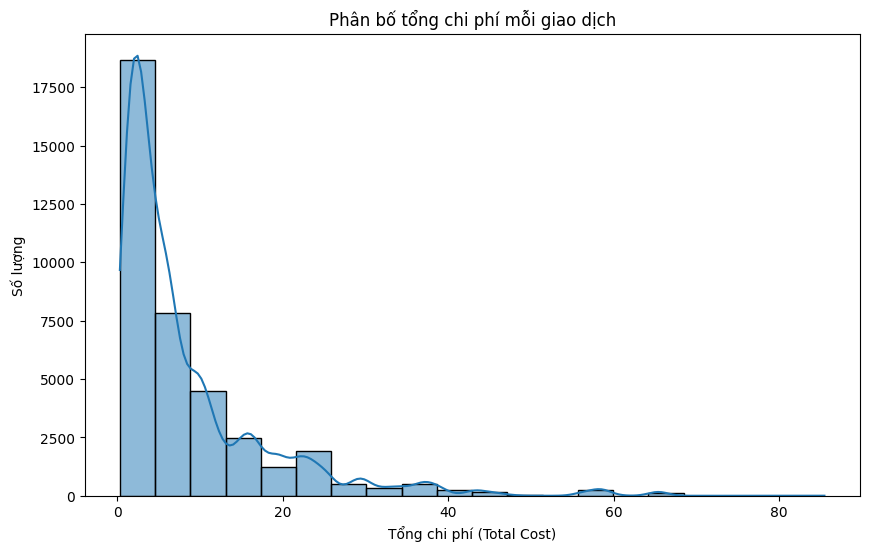

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total_Cost'], bins=20, kde=True)
plt.title('Phân bố tổng chi phí mỗi giao dịch')
plt.xlabel('Tổng chi phí (Total Cost)')
plt.ylabel('Số lượng')
plt.show()

             productName  Total_Cost
8                   beef     20007.0
156       tropical fruit     16426.8
94               napkins     14584.2
40                  curd      9790.2
145  specialty chocolate      9155.6
164           whole milk      9106.2
68        hamburger meat      8081.1
28             chocolate      8027.0
111                 pork      8006.4
34                coffee      7973.0


/var/folders/jw/z9bq55nx29sdfsqkbsy19_2h0000gn/T/ipykernel_9461/3418995867.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='productName', y='Total_Cost', palette='viridis')


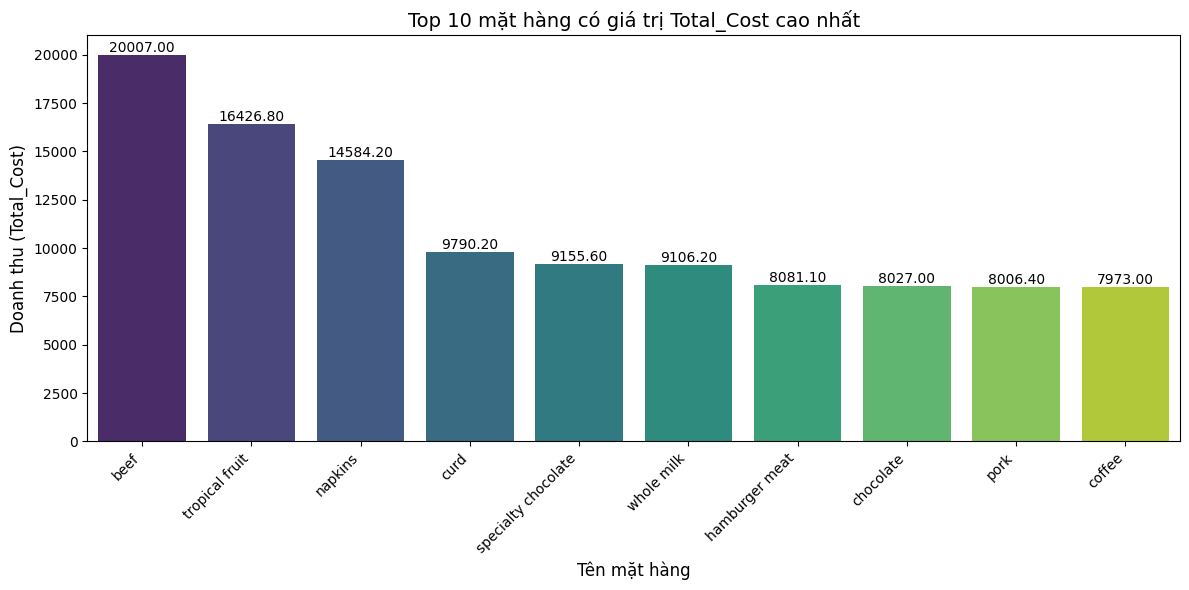

In [18]:
# Tổng Total_Cost theo productName
top_products = merged_df.groupby('productName')['Total_Cost'].sum().reset_index()
top_10_products = top_products.sort_values(by='Total_Cost', ascending=False).head(10)
print(top_10_products)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='productName', y='Total_Cost', palette='viridis')
plt.title('Top 10 mặt hàng có giá trị Total_Cost cao nhất', fontsize=14)
plt.xlabel('Tên mặt hàng', fontsize=12)
plt.ylabel('Doanh thu (Total_Cost)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(top_10_products['Total_Cost']):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')
plt.show()

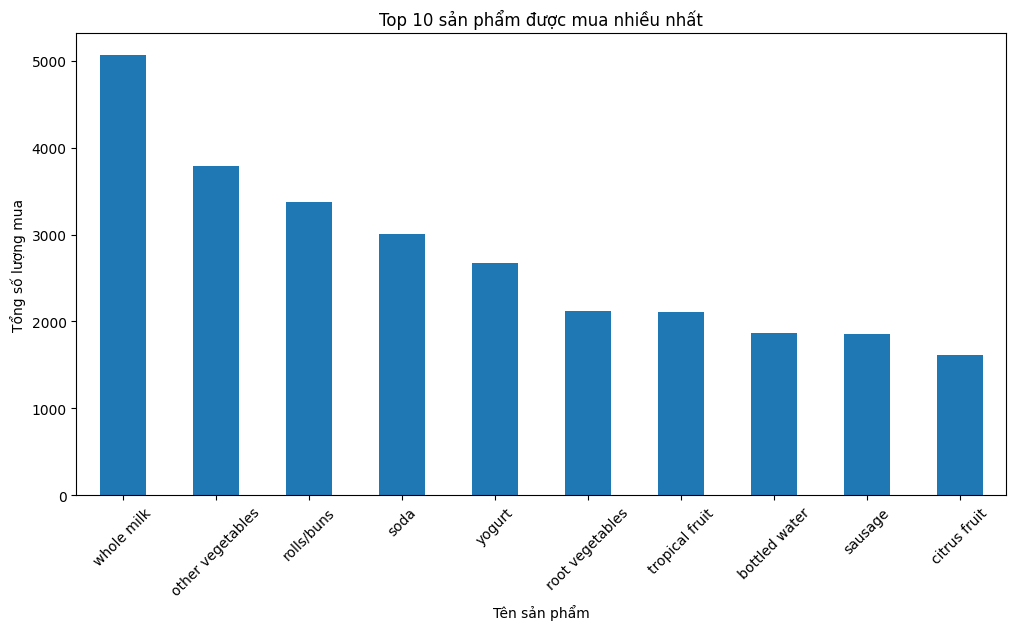

In [19]:
top_products = merged_df.groupby('productName')['items'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 sản phẩm được mua nhiều nhất')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Tổng số lượng mua')
plt.xticks(rotation=45)
plt.show()

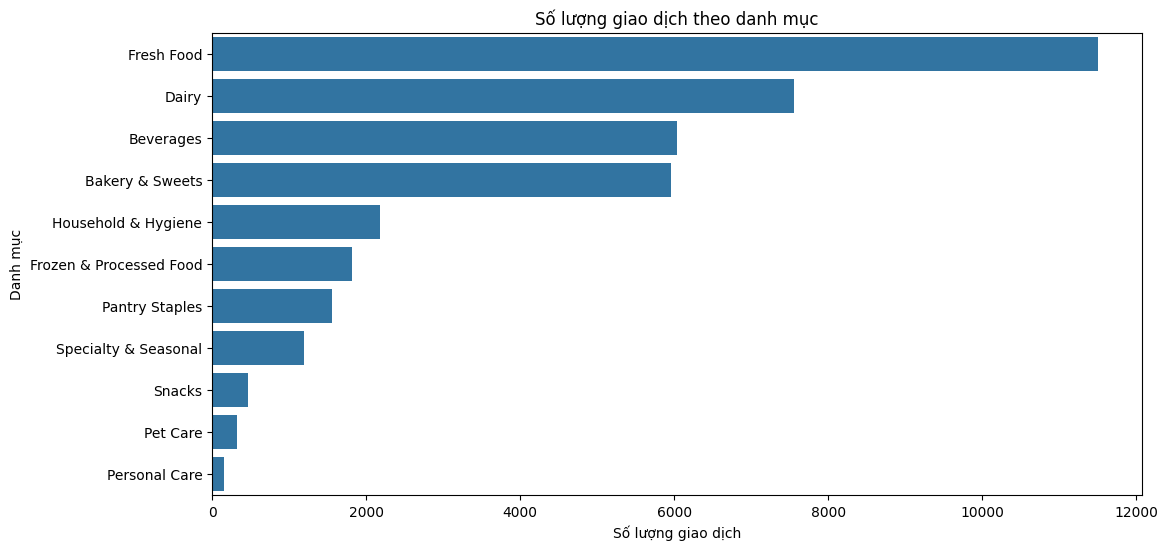

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=merged_df, order=merged_df['Category'].value_counts().index)
plt.title('Số lượng giao dịch theo danh mục')
plt.xlabel('Số lượng giao dịch')
plt.ylabel('Danh mục')
plt.show()

                   Category  Total_Cost
3                Fresh Food   118033.35
2                     Dairy    56145.44
0           Bakery & Sweets    41928.58
5       Household & Hygiene    35650.74
1                 Beverages    35456.30
4   Frozen & Processed Food    14391.72
6            Pantry Staples     9867.95
10     Specialty & Seasonal     8889.90
8                  Pet Care     6425.80
9                    Snacks     2728.40


/var/folders/jw/z9bq55nx29sdfsqkbsy19_2h0000gn/T/ipykernel_9461/1648703909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_categories, y='Category', x='Total_Cost', palette='viridis')


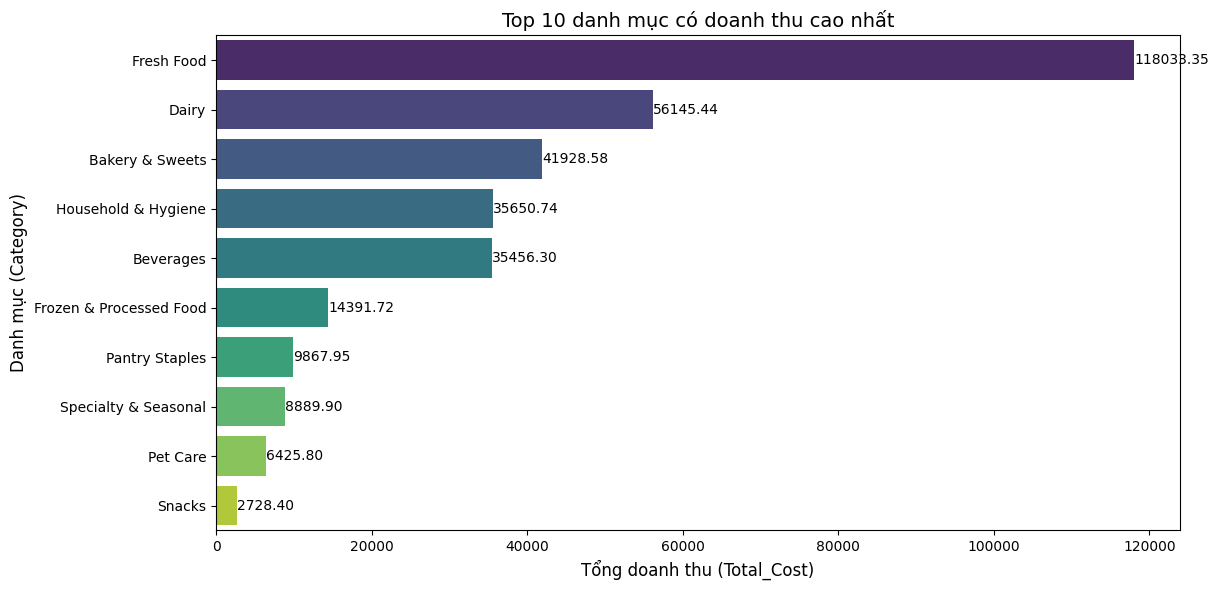

In [21]:
top_categories = merged_df.groupby('Category')['Total_Cost'].sum().reset_index()
top_10_categories = top_categories.sort_values(by='Total_Cost', ascending=False).head(10)
print(top_10_categories)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_categories, y='Category', x='Total_Cost', palette='viridis')
plt.title('Top 10 danh mục có doanh thu cao nhất', fontsize=14)
plt.xlabel('Tổng doanh thu (Total_Cost)', fontsize=12)
plt.ylabel('Danh mục (Category)', fontsize=12)
plt.tight_layout()
for i, v in enumerate(top_10_categories['Total_Cost']):
    plt.text(v + 0.5, i, f'{v:.2f}', va='center')
plt.show()

/var/folders/jw/z9bq55nx29sdfsqkbsy19_2h0000gn/T/ipykernel_9461/470889802.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_fresh_food, y='productName', x='Total_Cost', palette='viridis')


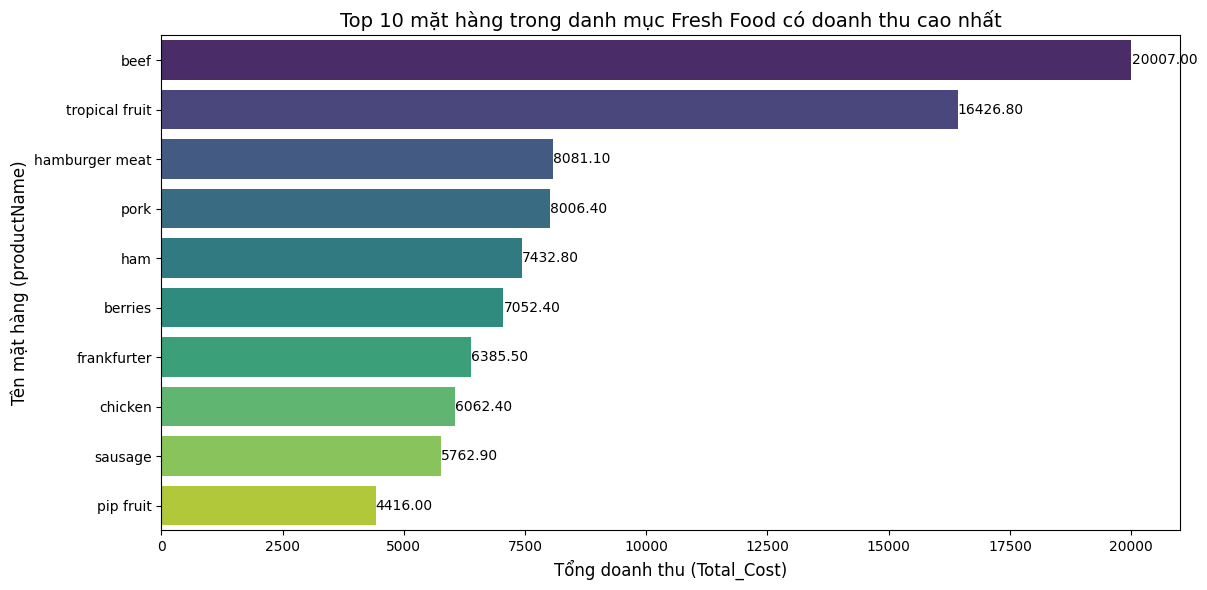

In [22]:
fresh_food_df = merged_df[merged_df['Category'] == 'Fresh Food']

top_fresh_food = fresh_food_df.groupby('productName')['Total_Cost'].sum().reset_index()

top_10_fresh_food = top_fresh_food.sort_values(by='Total_Cost', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_fresh_food, y='productName', x='Total_Cost', palette='viridis')
plt.title('Top 10 mặt hàng trong danh mục Fresh Food có doanh thu cao nhất', fontsize=14)
plt.xlabel('Tổng doanh thu (Total_Cost)', fontsize=12)
plt.ylabel('Tên mặt hàng (productName)', fontsize=12)
plt.tight_layout()
for i, v in enumerate(top_10_fresh_food['Total_Cost']):
    plt.text(v + 0.5, i, f'{v:.2f}', va='center')
plt.show()

In [23]:
output_file = 'merged_data.csv'  # Tên file đầu ra
merged_df.to_csv(output_file, index=False)